In [1]:
require(rtdists)
require(lattice)
require(ggplot2)

Loading required package: rtdists

Loading required package: lattice

Loading required package: ggplot2



As before we simulate data from a diffusion model, however, we want to simulate a whole experiment, hence we are going to add experimental conditions (congruent with our question) and multiple subjects

## Generating data for 50 participants

We want to create participants which present an inter-individual variability, therefore we define distribution on the parameters so that each individual receives a unique value for the three parameters I outlined in the course.

The distribution we will sample from are given below : 

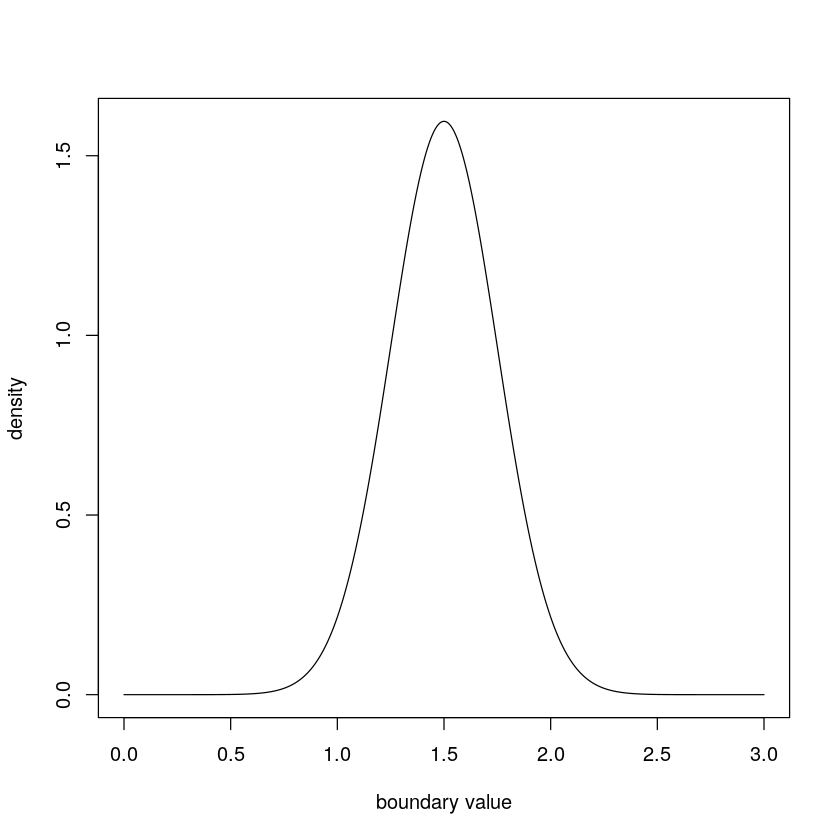

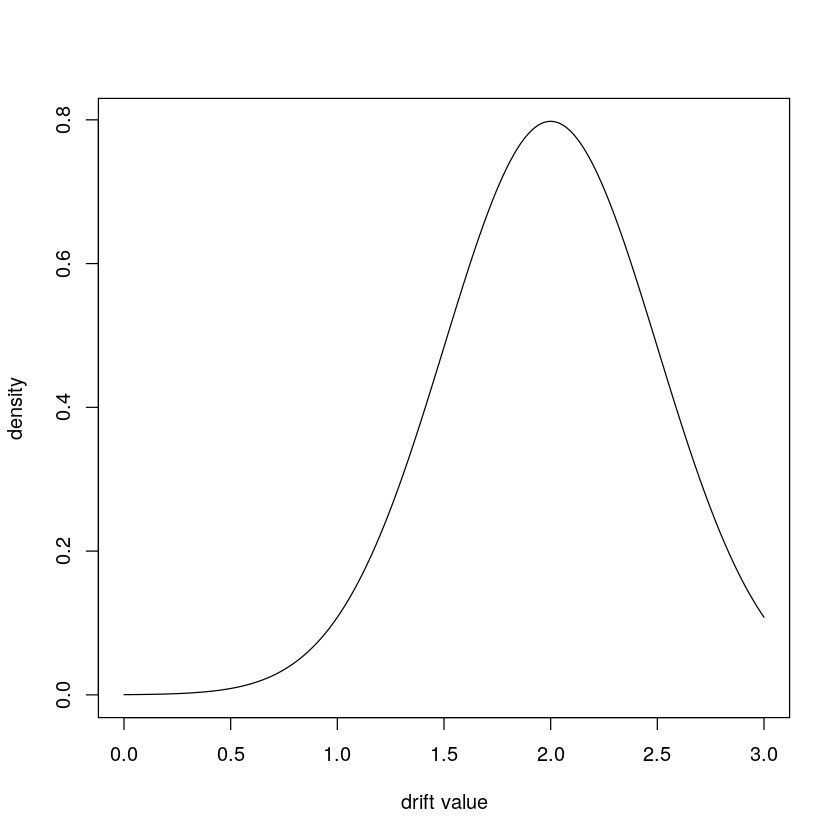

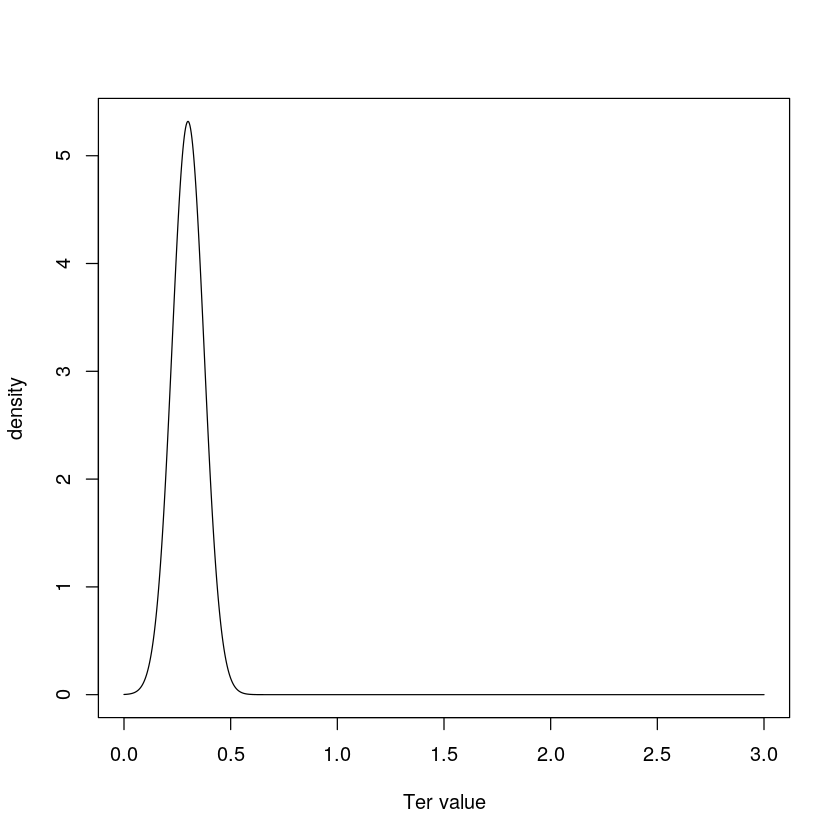

In [2]:
###### Boundary parameter
x = seq(0, 3, length=1000)
plot(x, dnorm(x, mean=1.5, sd=0.25), type="l", ylab="density", xlab="boundary value")
###### drift parameter
x = seq(0, 3, length=1000)
plot(x, dnorm(x, mean=2, sd=.5), type="l", ylab="density", xlab="drift value")
###### non-decision time parameter
x = seq(0, 3, length=1000)
plot(x, dnorm(x, mean=0.3, sd=0.075), type="l", ylab="density", xlab="Ter value")

Now we create a for loop were we generate 200 trials for 50 participants, each run draws random values for the three parameter of the Diffusion model

In [3]:
data = data.frame()
for(i in 1:50){
    a = rnorm(1, mean=1.5, sd=0.25)#rnorm = random sample(s) from a normal
    v = rnorm(1, mean=2, sd=.5)
    t0 = rnorm(1, mean=.3, sd=.075)
    subdata = rdiffusion(200, a, v, t0)#generating RT with drawn parameters
    subdata$participant = i #recording participant
    subdata$condition = "standard" #coding the condition
    data = rbind(data, subdata)#pasting the new subject to the df
}

In [5]:
tail(data)

,rt,response,participant,condition
,<dbl>,<fct>,<int>,<chr>
9995,0.4653095,upper,50,standard
9996,0.4022510,upper,50,standard
9997,0.9462035,upper,50,standard
9998,0.7378781,upper,50,standard
9999,0.7508147,upper,50,standard
10000,0.4818800,upper,50,standard


We can take a look at the RT distribution for all the participants

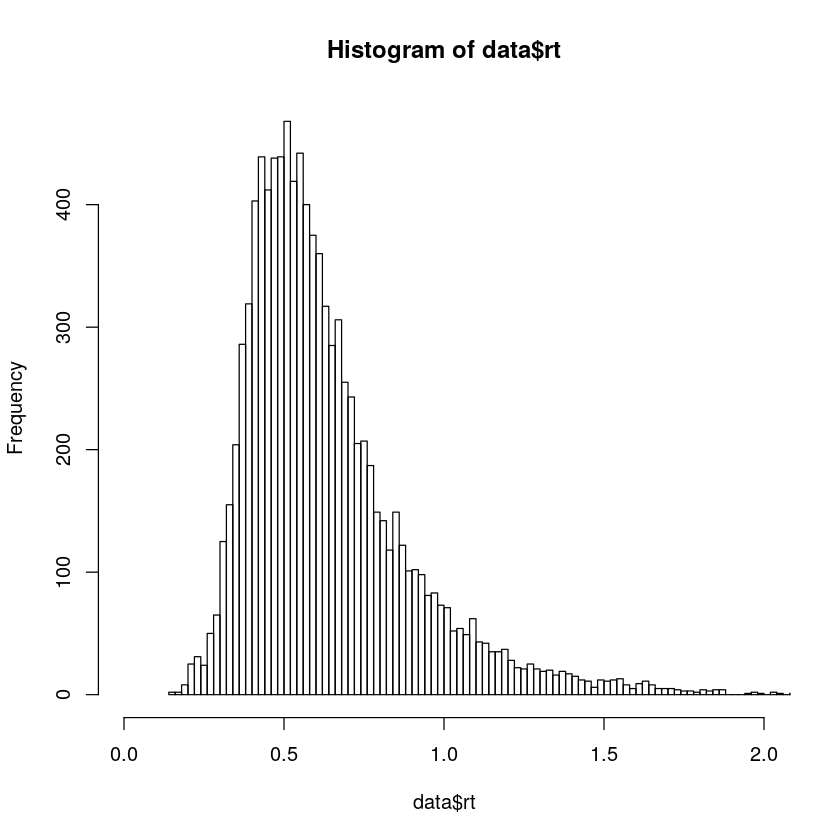

In [6]:
hist(data$rt, breaks=100, xlim=c(0,2))

or for each participant

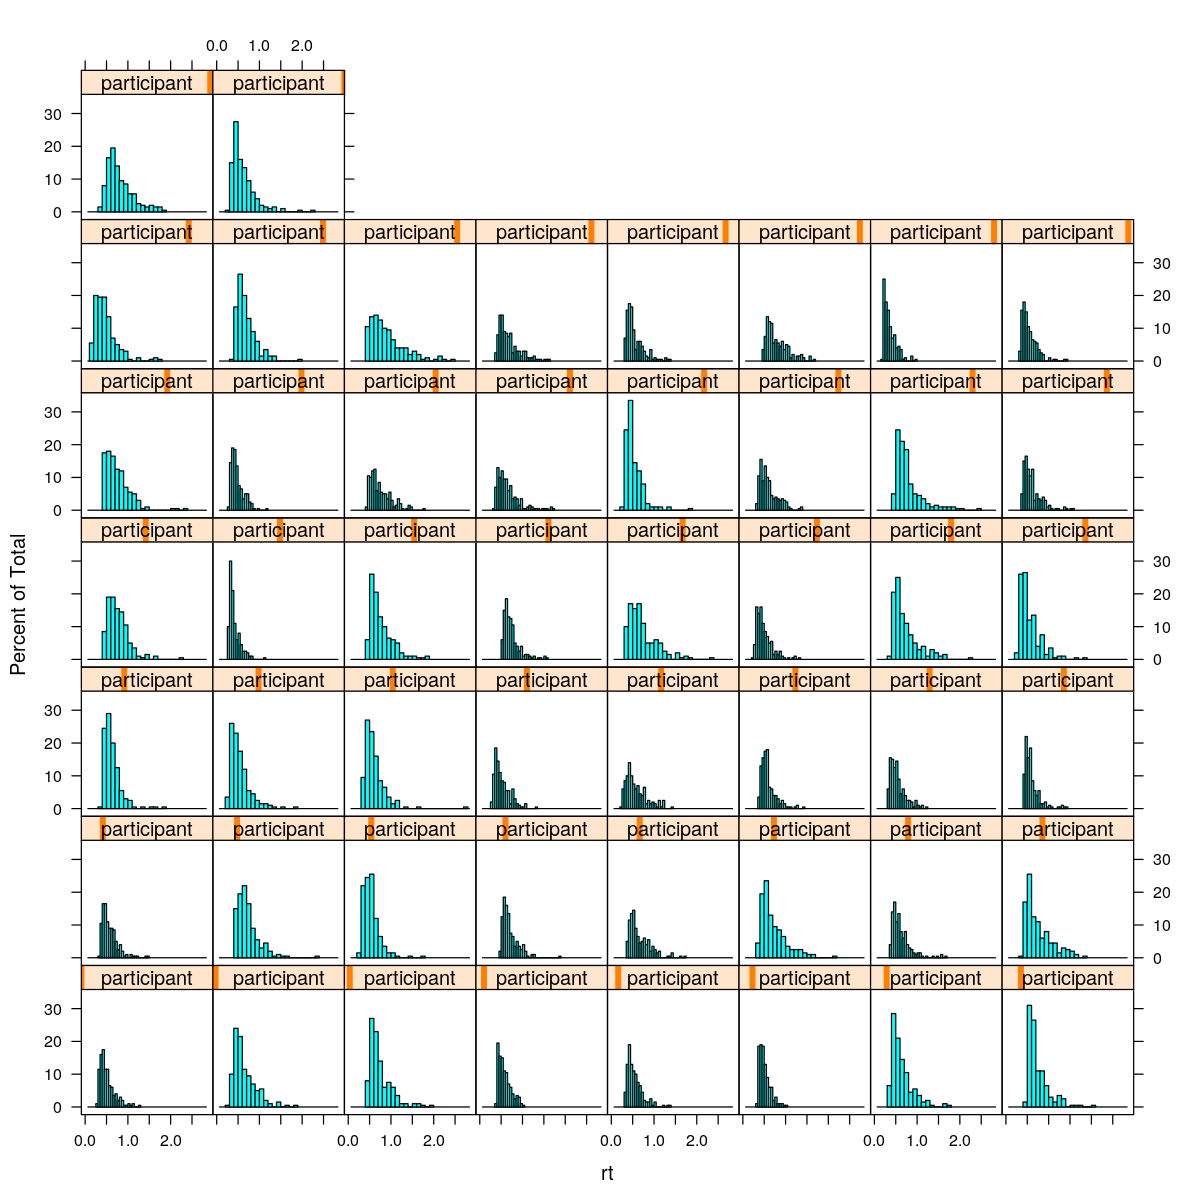

In [7]:
options(repr.plot.width=10, repr.plot.height=10)
histogram( ~ rt | participant ,data = data, breaks=20) 

## Adding experimental conditions of Speed Accuracy trade-off

We will now add an experimental condition were we for example ask participant to speed up their response. For that we will lower the boundary parameter, hence the participant will need less evidence before committing to a choice

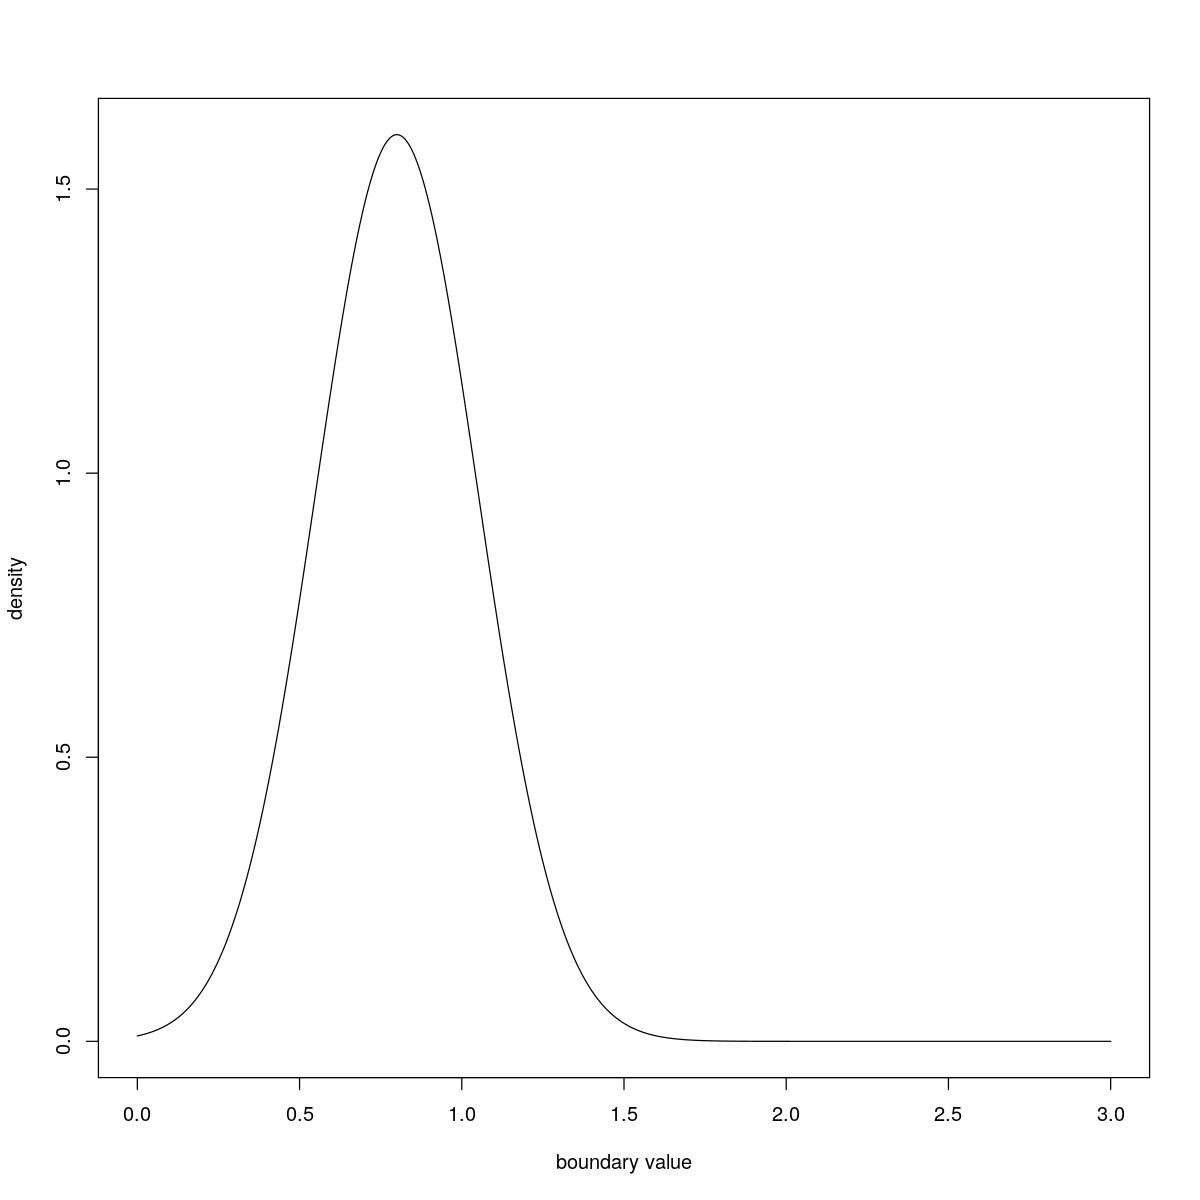

In [6]:
###### Boundary parameter
x = seq(0, 3, length=1000)
plot(x, dnorm(x, mean=.8, sd=0.25), type="l", ylab="density", xlab="boundary value")

In [8]:
for(i in 1:50){
    a = rnorm(1, mean=.8, sd=0.25)#Same as before I just changed the value of the mean of the boundary parameter 
    v = rnorm(1, mean=2, sd=.5)
    t0 = rnorm(1, mean=.3, sd=.075)
    
    subdata = rdiffusion(200, a, v, t0)
    subdata$participant = i
    subdata$condition = "speed"#different condition
    data = rbind(data, subdata)
}

In [9]:
tail(data)

,rt,response,participant,condition
,<dbl>,<fct>,<int>,<chr>
19995,0.6202323,upper,50,speed
19996,0.6275415,upper,50,speed
19997,0.5142999,upper,50,speed
19998,0.5107475,upper,50,speed
19999,0.5227139,upper,50,speed
20000,0.7522988,upper,50,speed


Comparing both conditions on the group RT distribution

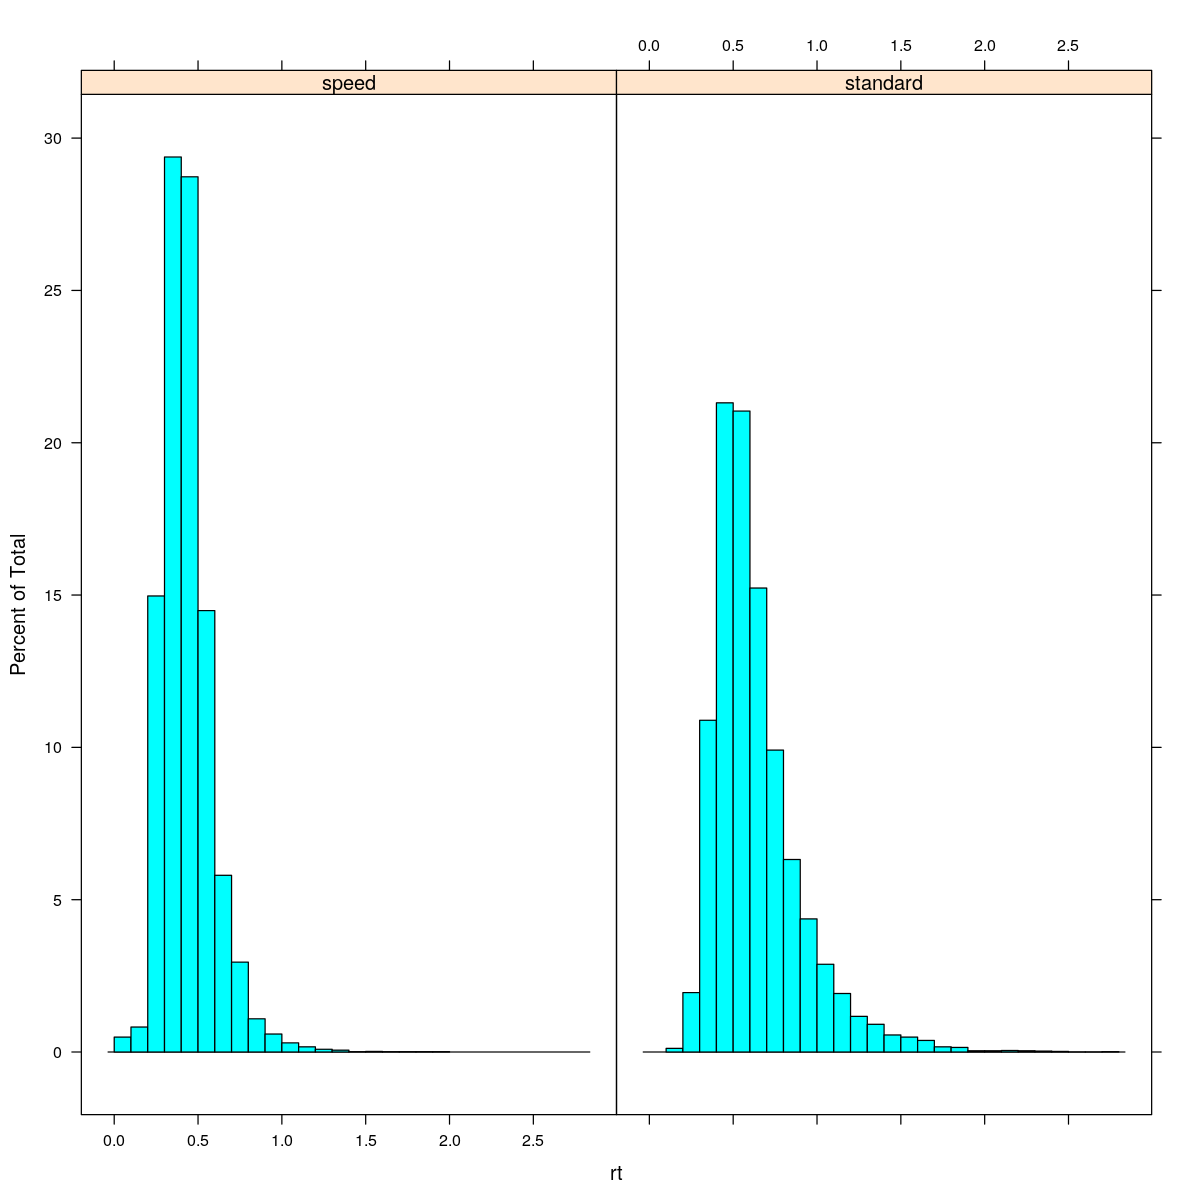

In [10]:
histogram( ~ rt | condition ,data = data, breaks=20) 

# Creating an example dataset with two IVs

As we are going to work with multiple regression we need two IVs. We can for example choose a factor that will affect the rate of evidence accumulation. To that end we will add an IV with 5 modalities, from low stimulus discrimination to a high stimulus discrimintation.
Additionnally, we add a second IV, we could choose the SAT example above or choose another factor. I have chosen to affect the third parameter, t0, for example by degrading the stimulus. Hence I expect that the time needed to encode the stimulus (t0) will be affected as well as the quality of the extracted evidence (drift rate).

I modify the drift rate with the value below.

In [9]:
for(k in 1:5 ){
    print(.5*k)
}
    

[1] 0.5
[1] 1
[1] 1.5
[1] 2
[1] 2.5


For the IV on the encoding I choose two modalities, either the stimulus is standard (e.g. word) or it is degraded (e.g. word with only some pixels) and I choose to affect both the t0 and the drift rate parameter

In [25]:
data = data.frame()#for simplicity we replace the df created up to now
for(i in 1:50){#50 stands for 50 participants
    #### Here we generate a set of 3 parameters for each participant
    t0 = rnorm(1, mean=.3, sd=.075)
    a = rnorm(1, mean=1.5, sd=0.25)
    v = rnorm(1, mean=0.15, sd=.15)
    for(j in c("standard",'degraded')){ #Here we add the two encoding condition, standard vs. degraded
        for(k in 1:5){ #Here we add the 5 stimulus difficulty conditions, the higher the value the easier the stimulus
            if(j == "degraded"){#degraded slows the t0 and divide by two the values of the drift rate
                #Note that we add some random noise in order to reflect inter-individual variability in the effects
                t0 = t0 + rnorm(1, mean=.1, sd=.025)#one value of t0 for each participant
                kv = v + k/2 + rnorm(1, mean=0, sd=0.1)
            }
            else{
                kv = v + k + rnorm(1, mean=0, sd=0.1)
            }
            subdata = rdiffusion(200, a, kv, t0)
            subdata$rt = subdata$rt
            subdata$participant = as.character(i)
            subdata$encoding = as.character(j)
            subdata$ease = as.character(k)
            data = rbind(data, subdata)
        }
    }
}

In [24]:
mean(data[data$SAT == "standard","rt"]) - mean(data[data$SAT == "speed","rt"])

[1] 0.1829078

In [20]:
tail(data)

,rt,response,participant,SAT,ease
,<dbl>,<fct>,<chr>,<chr>,<chr>
99995,0.2230751,upper,50,speed,5
99996,0.1754497,upper,50,speed,5
99997,0.2240707,upper,50,speed,5
99998,0.2397689,upper,50,speed,5
99999,0.2418526,upper,50,speed,5
100000,0.2225056,upper,50,speed,5


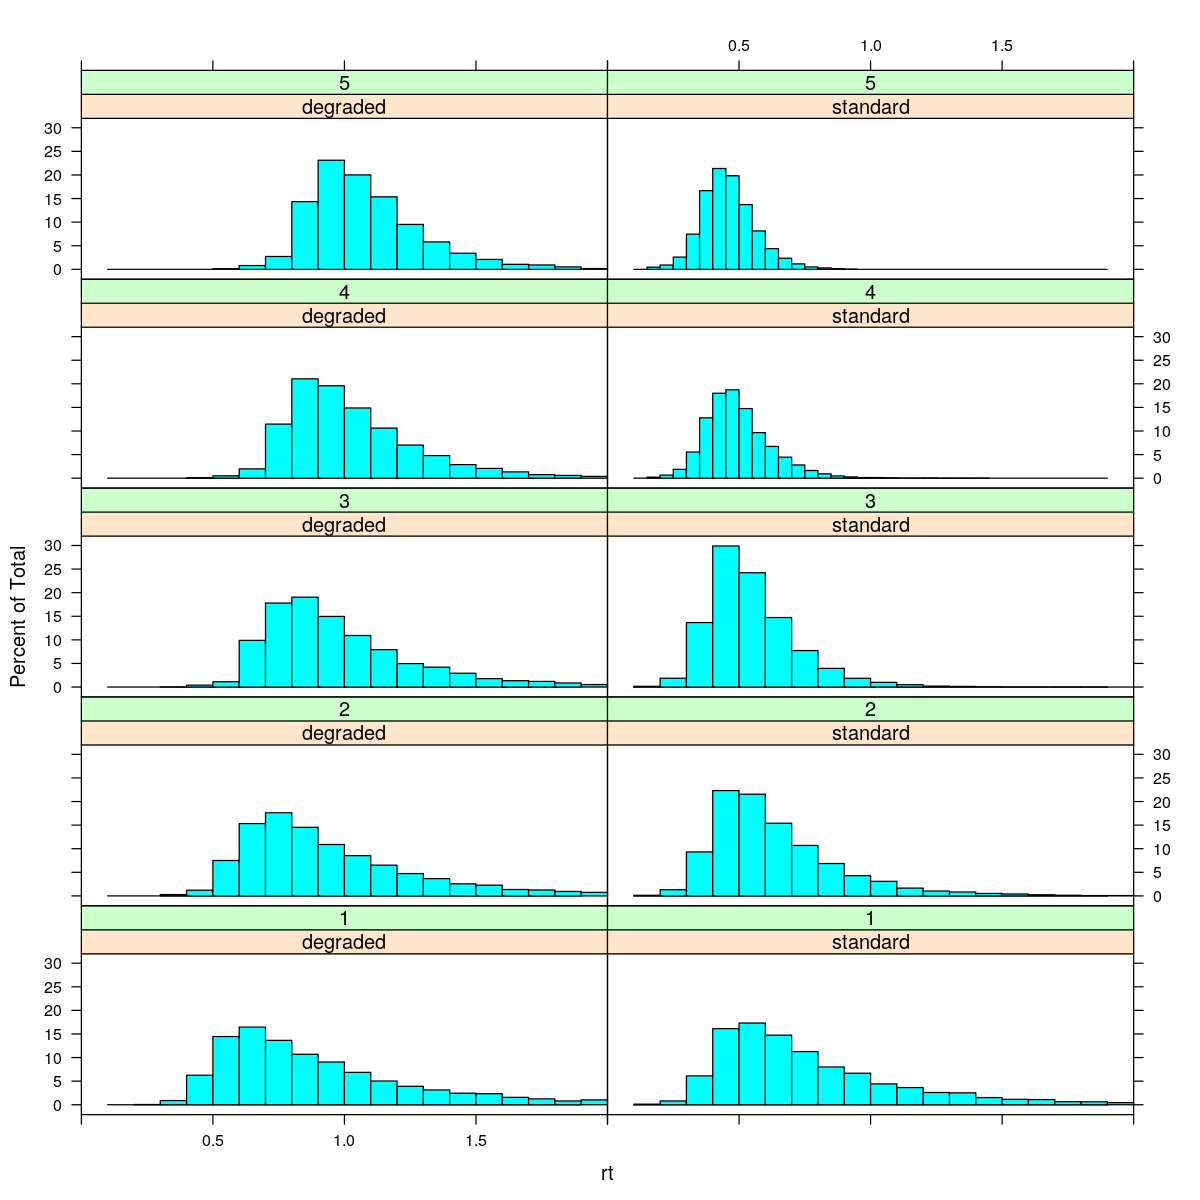

In [14]:
histogram( ~ rt | encoding + ease,data = data[data$rt < 2,], breaks=20, xlim=c(0,2))  

Now we save the data

In [26]:
write.table(data, file="data.csv")

# Exercice : 

- replace the second IV by a SAT condition with two levels as seen previously
- summarize the distribution of the parameter in the two conditions (mean and sd in modality speed vs standard)
- plot the histogram of simulated RT between both conditions at the group level